In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [36]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv',
                 parse_dates=['date'],
                 index_col='date')

In [37]:
# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025))
        & (df['value'] <= df['value'].quantile(0.975))]


In [38]:
def draw_line_plot():
  # Draw line plot
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(df.index, df['value'], 'r', linewidth=1)

  ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
  ax.set_xlabel('date')
  ax.set_ylabel('Page Views')

  # Save image and return fig (don't change this part)
  fig.savefig('line_plot.png')
  return fig

In [39]:
def draw_bar_plot():
  # Copy and modify data for monthly bar plot
    df['month'] = df.index.month
    df['year'] = df.index.year
    df_bar = df.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()
  # Draw bar plot
    fig = df_bar.plot.bar(legend=True,
                        figsize=(13, 6),
                        ylabel='Average Page Views',
                        xlabel='Years').figure
    plt.legend([
      'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
      'September', 'October', 'November', 'December'
      ], title='Months')
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

  # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

In [40]:
def draw_box_plot():
  # Prepare data for box plots (this part is done!)
  df_box = df.copy()
  df_box.reset_index(inplace=True)
  df_box['year'] = [d.year for d in df_box.date]
  df_box['month'] = [d.strftime('%b') for d in df_box.date]

  # Draw box plots (using Seaborn)
  df_box['month_num'] = df_box['date'].dt.month
  df_box = df_box.sort_values('month_num')

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
  axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axes[0])
  axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=axes[1])

  axes[0].set_title('Year-wise Box Plot (Trend)')
  axes[0].set_xlabel('Year')
  axes[0].set_ylabel('Page Views')

  axes[1].set_title('Month-wise Box Plot (Seasonality)')
  axes[1].set_xlabel('Month')
  axes[1].set_ylabel('Page Views')

  # Save image and return fig (don't change this part)
  fig.savefig('box_plot.png')
  return fig

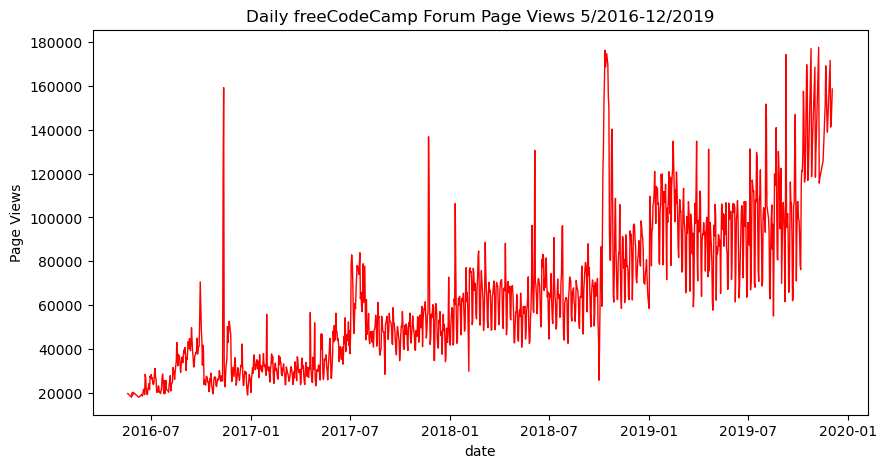

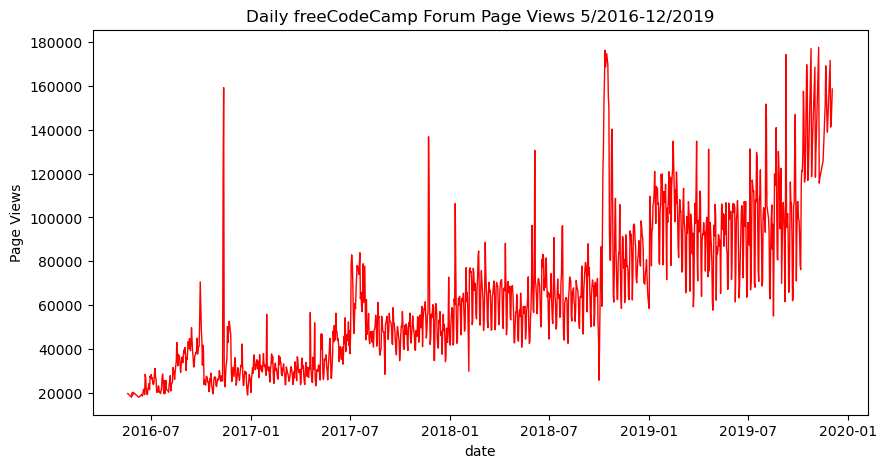

In [41]:
draw_line_plot()

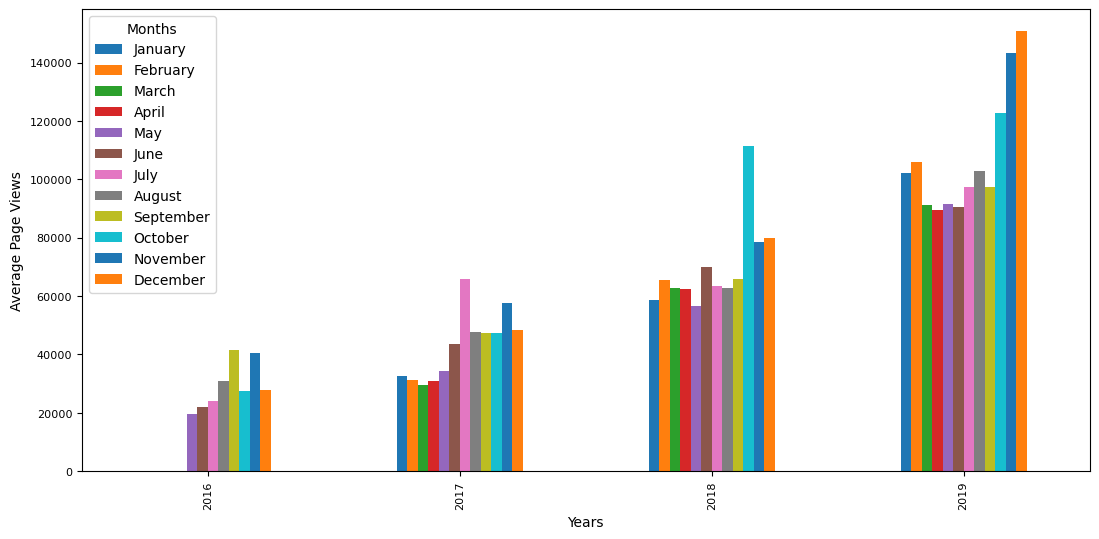

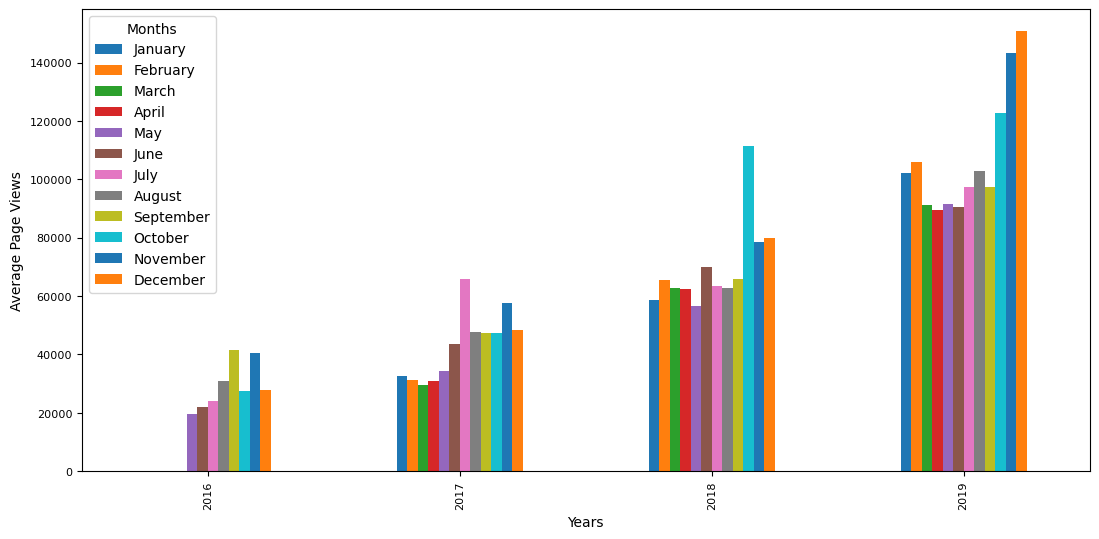

In [42]:
draw_bar_plot()

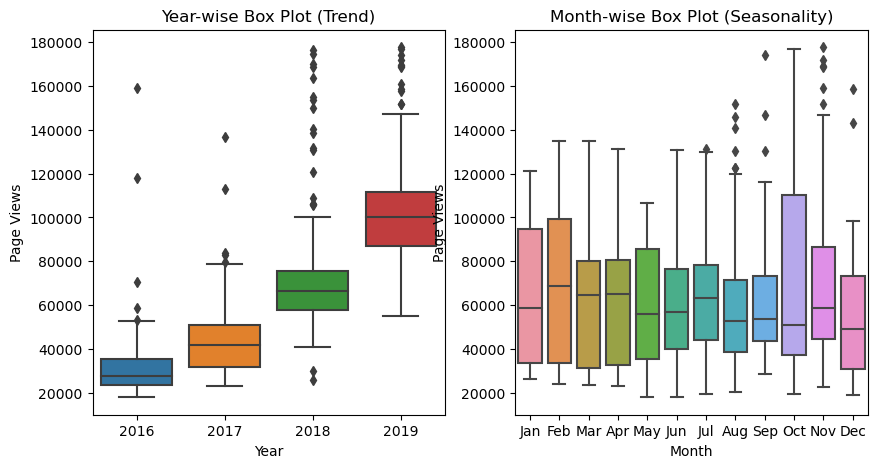

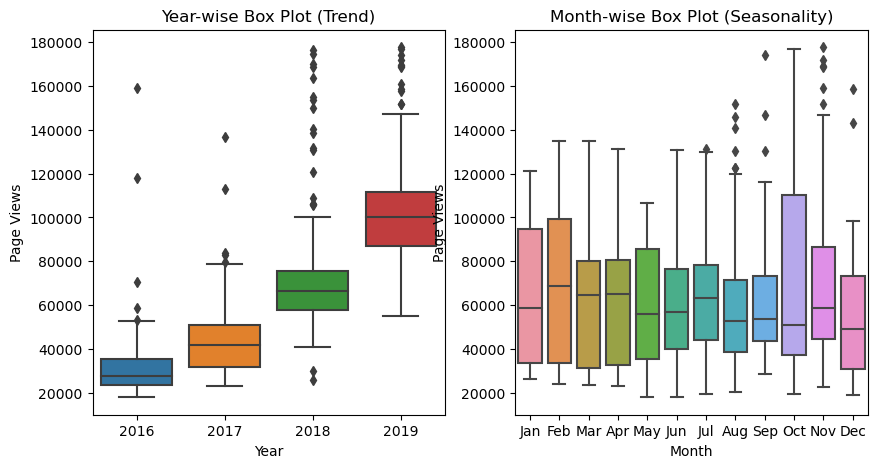

In [43]:
draw_box_plot()